##Prediction of Students Academic Performance Using Decision Tree and Random Forest Classifiers

In [1]:
#import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
from google.colab import files
student = pd.read_csv("Student's Performance Data.csv")

In [3]:
student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
student.shape

(480, 17)

In [5]:

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

# Exploring the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


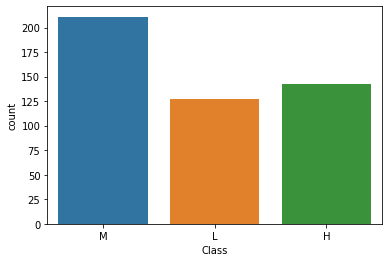

In [6]:
# Count of students of each class
sns.countplot(student['Class'])

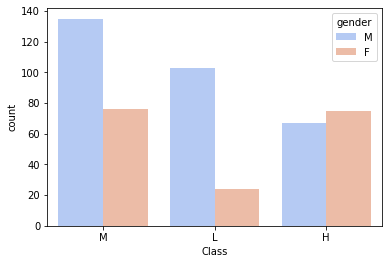

In [7]:
# Student class by gender
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

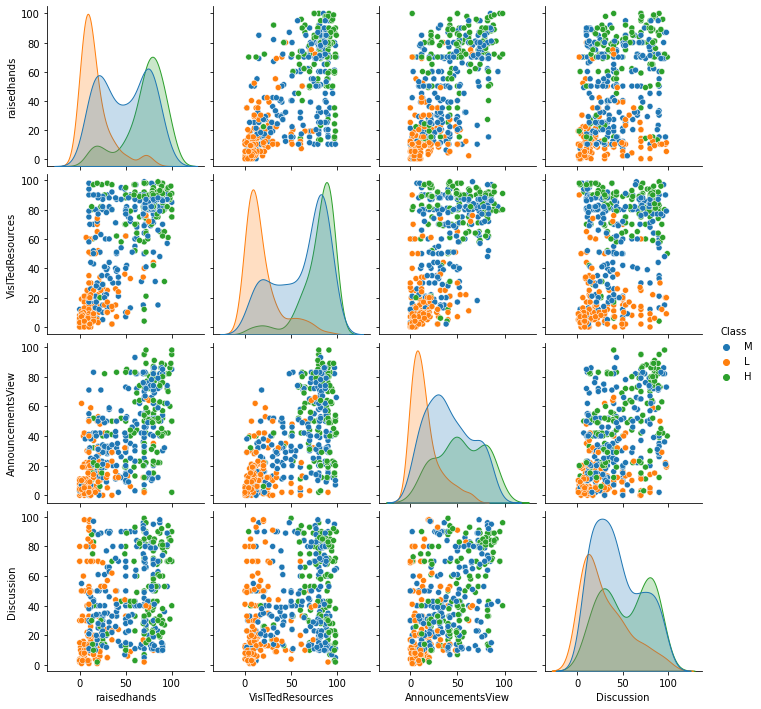

In [8]:
# Countplot based on the student Class
sns.pairplot(student,hue='Class')

# Feature Engineering

In [9]:
# Replacing categorical values to numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

#changing names of the features
nat = pd.get_dummies(student['NationalITy'])
sid = pd.get_dummies(student['StageID'])
gid = pd.get_dummies(student['GradeID'])
secid = pd.get_dummies(student['SectionID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rel = pd.get_dummies(student['Relation'])
pas = pd.get_dummies(student['ParentAnsweringSurvey'])
pss = pd.get_dummies(student['ParentschoolSatisfaction'])
sab = pd.get_dummies(student['StudentAbsenceDays'])

In [10]:
#remove the features which are not usefull
student.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

In [11]:
# Concatenating the variables we created above 
student = pd.concat([student,nat,sid,gid,secid,topic,semester,rel,pas,pss,sab],axis=1)

In [12]:
student.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Egypt,Iran,Iraq,Jordan,...,F,S,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7
0,0,15,16,2,20,M,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,0,20,20,3,25,M,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,10,7,0,30,L,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,30,25,5,35,L,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,40,50,12,50,M,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# Feature selection

In [13]:
# Check all the columns
student.columns

Index(['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'Class', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia',
       'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA',
       'lebanon', 'venzuela', 'HighSchool', 'MiddleSchool', 'lowerlevel',
       'G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11',
       'G-12', 'A', 'B', 'C', 'Arabic', 'Biology', 'Chemistry', 'English',
       'French', 'Geology', 'History', 'IT', 'Math', 'Quran', 'Science',
       'Spanish', 'F', 'S', 'Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7'],
      dtype='object')

In [14]:
y = student['Class'] # Class is the value we want to predict

X= student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion','Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7']]


# Scaling the data

In [15]:
#Standardize the dataset using standard scaler
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)

# Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training Models

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DTree = DecisionTreeClassifier(max_depth=5) 

In [20]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
y_train_pred = DTree.predict(X_train) 
print("Training Accuracy ",accuracy_score(y_train, y_train_pred)) 

Training Accuracy  0.8411458333333334


In [22]:
y_train_predict = DTree.predict(X_test)
DTree.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=5)

In [23]:
print("Testing Accuracy ",accuracy_score(y_test,y_train_predict))

Testing Accuracy  0.8229166666666666


In [24]:
from sklearn.tree import plot_tree

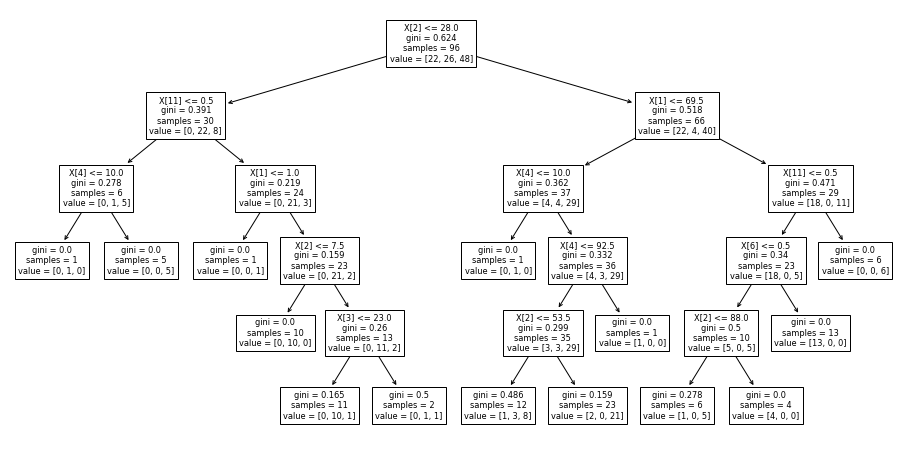

In [25]:
plt.figure(figsize=(16,8))
plot_tree(DTree);

#Tree with Tunning

In [26]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3,4 , 5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_test, y_test)


Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [27]:
Tree_best_para = grid_search.best_estimator_
Tree_best_para

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto',
                       random_state=1024)

In [28]:
grid_search.best_score_    

0.8010526315789473

# Random Forest Classifier

### Finding best number of estimators

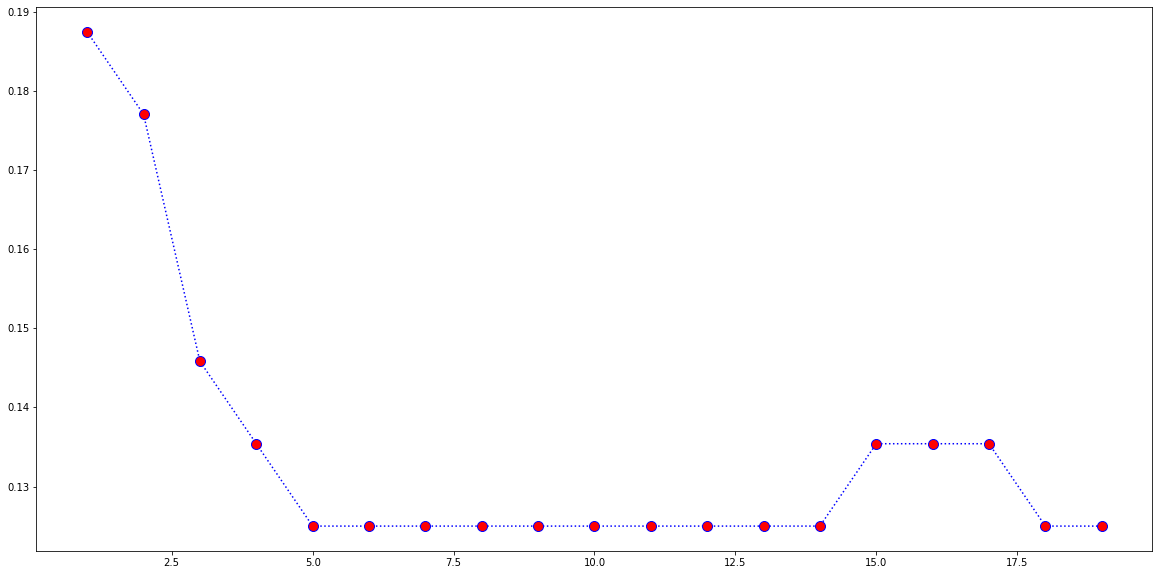

In [29]:
err = [] 

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

### Training the model 

In [30]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

In [31]:
print("Random Forest Classifier Accuracy Accuracy: ", accuracy_score(rfcpred,y_test))

Random Forest Classifier Accuracy Accuracy:  0.875


Random Forest Classifier

              precision    recall  f1-score   support

           H       0.86      0.82      0.84        22
           L       0.89      0.92      0.91        26
           M       0.88      0.88      0.88        48

    accuracy                           0.88        96
   macro avg       0.87      0.87      0.87        96
weighted avg       0.87      0.88      0.87        96



Confusion matrix


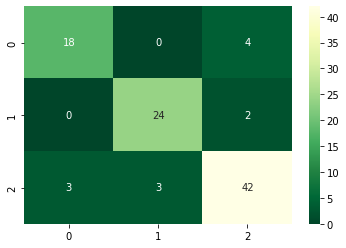

In [32]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')